## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              90.10
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                   7.74e-109
Time:                        15:47:33   Log-Likelihood:                         -295.56
No. Observations:                 404   AIC:                                      617.1
Df Residuals:                     391   BIC:                                      669.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


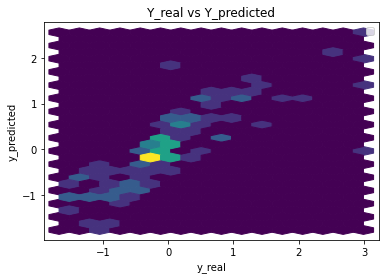

Performance Metrics
Mean Squared Error: 0.2981731372215643
Mean Absolute Error: 0.36663353345783306
Manhattan distance: 37.396620412698944
Euclidean distance: 5.514858112100397


Stats Model MAE 0.36663353345783306


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.03548


0:	learn: 0.9833392	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.9613593	total: 65.8ms	remaining: 32.8s
2:	learn: 0.9405295	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9227304	total: 73.9ms	remaining: 18.4s
4:	learn: 0.9042413	total: 76.3ms	remaining: 15.2s
5:	learn: 0.8856210	total: 79.7ms	remaining: 13.2s
6:	learn: 0.8700796	total: 83.3ms	remaining: 11.8s
7:	learn: 0.8525571	total: 86.5ms	remaining: 10.7s
8:	learn: 0.8366286	total: 90.7ms	remaining: 9.98s
9:	learn: 0.8192986	total: 93.8ms	remaining: 9.29s
10:	learn: 0.8059798	total: 97.7ms	remaining: 8.79s
11:	learn: 0.7915037	total: 100ms	remaining: 8.25s
12:	learn: 0.7759792	total: 104ms	remaining: 7.86s
13:	learn: 0.7603348	total: 106ms	remaining: 7.46s
14:	learn: 0.7482100	total: 114ms	remaining: 7.45s
15:	learn: 0.7339531	total: 118ms	remaining: 7.26s
16:	learn: 0.7203877	total: 121ms	remaining: 6.98s
17:	learn: 0.7064896	total: 128ms	remaining: 6.99s


18:	learn: 0.6942195	total: 161ms	remaining: 8.31s
19:	learn: 0.6807442	total: 167ms	remaining: 8.19s
20:	learn: 0.6678181	total: 173ms	remaining: 8.06s
21:	learn: 0.6569006	total: 177ms	remaining: 7.85s
22:	learn: 0.6455724	total: 179ms	remaining: 7.6s
23:	learn: 0.6365303	total: 182ms	remaining: 7.39s
24:	learn: 0.6259733	total: 184ms	remaining: 7.18s
25:	learn: 0.6169465	total: 192ms	remaining: 7.19s
26:	learn: 0.6080746	total: 195ms	remaining: 7.01s
27:	learn: 0.5990003	total: 198ms	remaining: 6.86s
28:	learn: 0.5894060	total: 205ms	remaining: 6.86s
29:	learn: 0.5793796	total: 208ms	remaining: 6.71s
30:	learn: 0.5701453	total: 210ms	remaining: 6.58s
31:	learn: 0.5629371	total: 213ms	remaining: 6.45s
32:	learn: 0.5557065	total: 216ms	remaining: 6.34s
33:	learn: 0.5476748	total: 218ms	remaining: 6.2s
34:	learn: 0.5409888	total: 220ms	remaining: 6.05s
35:	learn: 0.5337974	total: 223ms	remaining: 5.96s
36:	learn: 0.5280367	total: 287ms	remaining: 7.48s


37:	learn: 0.5205973	total: 306ms	remaining: 7.73s
38:	learn: 0.5127121	total: 308ms	remaining: 7.59s
39:	learn: 0.5054458	total: 310ms	remaining: 7.45s
40:	learn: 0.4977658	total: 313ms	remaining: 7.32s
41:	learn: 0.4902811	total: 317ms	remaining: 7.22s
42:	learn: 0.4853511	total: 319ms	remaining: 7.1s
43:	learn: 0.4798501	total: 323ms	remaining: 7.01s
44:	learn: 0.4739315	total: 326ms	remaining: 6.91s
45:	learn: 0.4678005	total: 331ms	remaining: 6.86s
46:	learn: 0.4613535	total: 334ms	remaining: 6.78s
47:	learn: 0.4555007	total: 341ms	remaining: 6.77s
48:	learn: 0.4507024	total: 348ms	remaining: 6.74s
49:	learn: 0.4454588	total: 353ms	remaining: 6.7s
50:	learn: 0.4399885	total: 356ms	remaining: 6.63s
51:	learn: 0.4360469	total: 360ms	remaining: 6.57s
52:	learn: 0.4319382	total: 366ms	remaining: 6.54s
53:	learn: 0.4279272	total: 368ms	remaining: 6.45s
54:	learn: 0.4235525	total: 371ms	remaining: 6.37s
55:	learn: 0.4198320	total: 374ms	remaining: 6.3s
56:	learn: 0.4164260	total: 379ms	

59:	learn: 0.4051786	total: 390ms	remaining: 6.11s
60:	learn: 0.4012702	total: 454ms	remaining: 7s
61:	learn: 0.3973775	total: 459ms	remaining: 6.94s
62:	learn: 0.3943947	total: 464ms	remaining: 6.9s
63:	learn: 0.3907131	total: 470ms	remaining: 6.87s
64:	learn: 0.3877205	total: 473ms	remaining: 6.81s
65:	learn: 0.3844518	total: 476ms	remaining: 6.74s
66:	learn: 0.3805180	total: 480ms	remaining: 6.68s
67:	learn: 0.3766733	total: 483ms	remaining: 6.62s
68:	learn: 0.3743938	total: 486ms	remaining: 6.56s
69:	learn: 0.3713733	total: 489ms	remaining: 6.5s
70:	learn: 0.3674718	total: 492ms	remaining: 6.43s
71:	learn: 0.3650809	total: 497ms	remaining: 6.41s
72:	learn: 0.3626112	total: 500ms	remaining: 6.35s
73:	learn: 0.3599672	total: 567ms	remaining: 7.1s
74:	learn: 0.3570638	total: 573ms	remaining: 7.06s
75:	learn: 0.3549682	total: 576ms	remaining: 7s


76:	learn: 0.3525462	total: 583ms	remaining: 6.98s
77:	learn: 0.3487829	total: 587ms	remaining: 6.94s
78:	learn: 0.3456219	total: 592ms	remaining: 6.91s
79:	learn: 0.3436023	total: 597ms	remaining: 6.86s
80:	learn: 0.3416327	total: 601ms	remaining: 6.82s
81:	learn: 0.3390839	total: 604ms	remaining: 6.76s
82:	learn: 0.3366696	total: 607ms	remaining: 6.7s
83:	learn: 0.3345119	total: 609ms	remaining: 6.64s
84:	learn: 0.3323950	total: 613ms	remaining: 6.6s
85:	learn: 0.3298029	total: 616ms	remaining: 6.55s
86:	learn: 0.3280403	total: 637ms	remaining: 6.68s
87:	learn: 0.3256404	total: 642ms	remaining: 6.65s
88:	learn: 0.3234814	total: 645ms	remaining: 6.6s
89:	learn: 0.3215070	total: 647ms	remaining: 6.55s
90:	learn: 0.3193537	total: 660ms	remaining: 6.59s
91:	learn: 0.3175926	total: 666ms	remaining: 6.57s
92:	learn: 0.3159021	total: 670ms	remaining: 6.54s
93:	learn: 0.3137430	total: 673ms	remaining: 6.48s
94:	learn: 0.3121858	total: 678ms	remaining: 6.46s
95:	learn: 0.3113746	total: 682ms	

100:	learn: 0.3023040	total: 716ms	remaining: 6.37s
101:	learn: 0.3005127	total: 720ms	remaining: 6.33s
102:	learn: 0.2989412	total: 723ms	remaining: 6.29s
103:	learn: 0.2972197	total: 726ms	remaining: 6.25s
104:	learn: 0.2958167	total: 728ms	remaining: 6.21s
105:	learn: 0.2943172	total: 731ms	remaining: 6.16s
106:	learn: 0.2928411	total: 733ms	remaining: 6.12s
107:	learn: 0.2912925	total: 735ms	remaining: 6.07s
108:	learn: 0.2899956	total: 738ms	remaining: 6.03s
109:	learn: 0.2886955	total: 740ms	remaining: 5.99s
110:	learn: 0.2873845	total: 743ms	remaining: 5.95s
111:	learn: 0.2861966	total: 745ms	remaining: 5.91s
112:	learn: 0.2847612	total: 748ms	remaining: 5.87s
113:	learn: 0.2835347	total: 752ms	remaining: 5.84s
114:	learn: 0.2821952	total: 755ms	remaining: 5.81s
115:	learn: 0.2813074	total: 757ms	remaining: 5.77s
116:	learn: 0.2801061	total: 760ms	remaining: 5.73s
117:	learn: 0.2790015	total: 762ms	remaining: 5.69s
118:	learn: 0.2778923	total: 765ms	remaining: 5.66s
119:	learn: 

132:	learn: 0.2626248	total: 836ms	remaining: 5.45s
133:	learn: 0.2618474	total: 841ms	remaining: 5.43s
134:	learn: 0.2612105	total: 855ms	remaining: 5.47s
135:	learn: 0.2605865	total: 857ms	remaining: 5.44s


136:	learn: 0.2599419	total: 866ms	remaining: 5.45s
137:	learn: 0.2590764	total: 871ms	remaining: 5.44s
138:	learn: 0.2576750	total: 887ms	remaining: 5.5s
139:	learn: 0.2565223	total: 890ms	remaining: 5.47s
140:	learn: 0.2556590	total: 895ms	remaining: 5.45s
141:	learn: 0.2544668	total: 898ms	remaining: 5.42s
142:	learn: 0.2535638	total: 901ms	remaining: 5.4s
143:	learn: 0.2525433	total: 904ms	remaining: 5.37s
144:	learn: 0.2517870	total: 906ms	remaining: 5.34s
145:	learn: 0.2508089	total: 911ms	remaining: 5.33s
146:	learn: 0.2500470	total: 914ms	remaining: 5.3s
147:	learn: 0.2494269	total: 917ms	remaining: 5.28s
148:	learn: 0.2483665	total: 919ms	remaining: 5.25s
149:	learn: 0.2478695	total: 923ms	remaining: 5.23s
150:	learn: 0.2468731	total: 926ms	remaining: 5.21s
151:	learn: 0.2461316	total: 931ms	remaining: 5.2s
152:	learn: 0.2453112	total: 935ms	remaining: 5.18s
153:	learn: 0.2442348	total: 939ms	remaining: 5.16s
154:	learn: 0.2433744	total: 941ms	remaining: 5.13s
155:	learn: 0.24

158:	learn: 0.2403321	total: 1.01s	remaining: 5.37s
159:	learn: 0.2394475	total: 1.02s	remaining: 5.36s
160:	learn: 0.2386729	total: 1.02s	remaining: 5.34s
161:	learn: 0.2379552	total: 1.04s	remaining: 5.36s
162:	learn: 0.2373364	total: 1.04s	remaining: 5.37s
163:	learn: 0.2363922	total: 1.05s	remaining: 5.35s
164:	learn: 0.2356531	total: 1.05s	remaining: 5.33s
165:	learn: 0.2350371	total: 1.06s	remaining: 5.33s
166:	learn: 0.2344678	total: 1.06s	remaining: 5.31s
167:	learn: 0.2337771	total: 1.07s	remaining: 5.29s
168:	learn: 0.2332002	total: 1.08s	remaining: 5.32s
169:	learn: 0.2325463	total: 1.08s	remaining: 5.3s
170:	learn: 0.2318026	total: 1.09s	remaining: 5.27s
171:	learn: 0.2313693	total: 1.09s	remaining: 5.24s
172:	learn: 0.2308039	total: 1.09s	remaining: 5.21s
173:	learn: 0.2304053	total: 1.09s	remaining: 5.19s


174:	learn: 0.2298861	total: 1.11s	remaining: 5.25s
175:	learn: 0.2293642	total: 1.11s	remaining: 5.22s
176:	learn: 0.2288450	total: 1.12s	remaining: 5.19s
177:	learn: 0.2281358	total: 1.12s	remaining: 5.17s
178:	learn: 0.2273616	total: 1.12s	remaining: 5.16s
179:	learn: 0.2264547	total: 1.13s	remaining: 5.14s
180:	learn: 0.2257732	total: 1.13s	remaining: 5.12s
181:	learn: 0.2253107	total: 1.13s	remaining: 5.1s
182:	learn: 0.2245783	total: 1.14s	remaining: 5.09s
183:	learn: 0.2240583	total: 1.14s	remaining: 5.07s
184:	learn: 0.2231941	total: 1.15s	remaining: 5.05s
185:	learn: 0.2225455	total: 1.15s	remaining: 5.02s
186:	learn: 0.2216868	total: 1.15s	remaining: 5.01s
187:	learn: 0.2213689	total: 1.15s	remaining: 4.99s
188:	learn: 0.2208434	total: 1.16s	remaining: 4.98s
189:	learn: 0.2200004	total: 1.16s	remaining: 4.96s
190:	learn: 0.2195081	total: 1.17s	remaining: 4.94s
191:	learn: 0.2187325	total: 1.17s	remaining: 4.91s
192:	learn: 0.2179929	total: 1.18s	remaining: 4.94s
193:	learn: 0

200:	learn: 0.2130846	total: 1.27s	remaining: 5.04s
201:	learn: 0.2126164	total: 1.29s	remaining: 5.08s
202:	learn: 0.2119882	total: 1.29s	remaining: 5.06s
203:	learn: 0.2112271	total: 1.29s	remaining: 5.03s
204:	learn: 0.2103995	total: 1.29s	remaining: 5.01s
205:	learn: 0.2098494	total: 1.3s	remaining: 5s
206:	learn: 0.2092617	total: 1.3s	remaining: 4.98s
207:	learn: 0.2086067	total: 1.3s	remaining: 4.96s
208:	learn: 0.2081557	total: 1.3s	remaining: 4.94s
209:	learn: 0.2075580	total: 1.31s	remaining: 4.92s
210:	learn: 0.2067329	total: 1.31s	remaining: 4.91s
211:	learn: 0.2062996	total: 1.31s	remaining: 4.89s
212:	learn: 0.2054867	total: 1.32s	remaining: 4.87s
213:	learn: 0.2051443	total: 1.32s	remaining: 4.85s
214:	learn: 0.2047602	total: 1.32s	remaining: 4.83s
215:	learn: 0.2044165	total: 1.33s	remaining: 4.81s
216:	learn: 0.2039959	total: 1.33s	remaining: 4.79s
217:	learn: 0.2036563	total: 1.33s	remaining: 4.78s
218:	learn: 0.2031365	total: 1.34s	remaining: 4.77s
219:	learn: 0.20246

230:	learn: 0.1972200	total: 1.38s	remaining: 4.58s
231:	learn: 0.1965926	total: 1.44s	remaining: 4.76s
232:	learn: 0.1963705	total: 1.44s	remaining: 4.75s
233:	learn: 0.1959604	total: 1.45s	remaining: 4.74s
234:	learn: 0.1956613	total: 1.49s	remaining: 4.84s
235:	learn: 0.1951947	total: 1.49s	remaining: 4.83s
236:	learn: 0.1945836	total: 1.49s	remaining: 4.81s
237:	learn: 0.1940483	total: 1.5s	remaining: 4.8s
238:	learn: 0.1938464	total: 1.5s	remaining: 4.79s


239:	learn: 0.1935061	total: 1.51s	remaining: 4.78s
240:	learn: 0.1930197	total: 1.51s	remaining: 4.77s
241:	learn: 0.1926174	total: 1.52s	remaining: 4.75s
242:	learn: 0.1921064	total: 1.52s	remaining: 4.74s
243:	learn: 0.1916511	total: 1.52s	remaining: 4.73s
244:	learn: 0.1910633	total: 1.53s	remaining: 4.71s
245:	learn: 0.1904515	total: 1.53s	remaining: 4.69s
246:	learn: 0.1899111	total: 1.53s	remaining: 4.67s
247:	learn: 0.1893668	total: 1.54s	remaining: 4.66s
248:	learn: 0.1887838	total: 1.54s	remaining: 4.65s
249:	learn: 0.1883764	total: 1.54s	remaining: 4.64s
250:	learn: 0.1881885	total: 1.55s	remaining: 4.62s
251:	learn: 0.1877638	total: 1.61s	remaining: 4.78s
252:	learn: 0.1875889	total: 1.61s	remaining: 4.77s
253:	learn: 0.1870937	total: 1.62s	remaining: 4.76s


254:	learn: 0.1866776	total: 1.63s	remaining: 4.75s
255:	learn: 0.1860870	total: 1.63s	remaining: 4.73s
256:	learn: 0.1857521	total: 1.63s	remaining: 4.72s
257:	learn: 0.1851505	total: 1.64s	remaining: 4.7s
258:	learn: 0.1846365	total: 1.64s	remaining: 4.69s
259:	learn: 0.1838796	total: 1.64s	remaining: 4.67s
260:	learn: 0.1836932	total: 1.65s	remaining: 4.66s
261:	learn: 0.1832669	total: 1.65s	remaining: 4.65s
262:	learn: 0.1830180	total: 1.65s	remaining: 4.63s
263:	learn: 0.1823298	total: 1.66s	remaining: 4.62s
264:	learn: 0.1819651	total: 1.66s	remaining: 4.6s
265:	learn: 0.1818039	total: 1.66s	remaining: 4.59s
266:	learn: 0.1813591	total: 1.66s	remaining: 4.57s
267:	learn: 0.1805534	total: 1.67s	remaining: 4.55s
268:	learn: 0.1800283	total: 1.67s	remaining: 4.54s
269:	learn: 0.1794962	total: 1.67s	remaining: 4.52s
270:	learn: 0.1792319	total: 1.68s	remaining: 4.51s
271:	learn: 0.1787430	total: 1.68s	remaining: 4.49s
272:	learn: 0.1783867	total: 1.68s	remaining: 4.48s
273:	learn: 0.

281:	learn: 0.1747926	total: 1.8s	remaining: 4.59s
282:	learn: 0.1743328	total: 1.82s	remaining: 4.61s
283:	learn: 0.1739329	total: 1.82s	remaining: 4.6s
284:	learn: 0.1736470	total: 1.83s	remaining: 4.58s
285:	learn: 0.1733062	total: 1.83s	remaining: 4.57s
286:	learn: 0.1729068	total: 1.83s	remaining: 4.56s
287:	learn: 0.1727828	total: 1.84s	remaining: 4.54s
288:	learn: 0.1724852	total: 1.84s	remaining: 4.54s
289:	learn: 0.1721595	total: 1.85s	remaining: 4.52s
290:	learn: 0.1717494	total: 1.85s	remaining: 4.51s
291:	learn: 0.1714788	total: 1.85s	remaining: 4.5s
292:	learn: 0.1713848	total: 1.86s	remaining: 4.48s
293:	learn: 0.1712231	total: 1.86s	remaining: 4.47s
294:	learn: 0.1708039	total: 1.86s	remaining: 4.46s
295:	learn: 0.1703323	total: 1.87s	remaining: 4.44s
296:	learn: 0.1699859	total: 1.87s	remaining: 4.43s
297:	learn: 0.1698866	total: 1.88s	remaining: 4.42s
298:	learn: 0.1694534	total: 1.88s	remaining: 4.41s
299:	learn: 0.1690938	total: 1.88s	remaining: 4.4s
300:	learn: 0.16

306:	learn: 0.1671996	total: 2.03s	remaining: 4.58s
307:	learn: 0.1669354	total: 2.03s	remaining: 4.56s
308:	learn: 0.1668941	total: 2.03s	remaining: 4.54s
309:	learn: 0.1667805	total: 2.04s	remaining: 4.53s
310:	learn: 0.1665842	total: 2.04s	remaining: 4.52s
311:	learn: 0.1660081	total: 2.04s	remaining: 4.5s
312:	learn: 0.1656191	total: 2.04s	remaining: 4.49s
313:	learn: 0.1653321	total: 2.05s	remaining: 4.47s
314:	learn: 0.1649537	total: 2.05s	remaining: 4.46s
315:	learn: 0.1647548	total: 2.05s	remaining: 4.44s
316:	learn: 0.1646690	total: 2.06s	remaining: 4.43s
317:	learn: 0.1643145	total: 2.06s	remaining: 4.41s
318:	learn: 0.1641349	total: 2.06s	remaining: 4.4s
319:	learn: 0.1637088	total: 2.06s	remaining: 4.39s
320:	learn: 0.1633480	total: 2.07s	remaining: 4.38s
321:	learn: 0.1632556	total: 2.07s	remaining: 4.37s
322:	learn: 0.1628379	total: 2.08s	remaining: 4.36s
323:	learn: 0.1627112	total: 2.08s	remaining: 4.35s
324:	learn: 0.1624838	total: 2.09s	remaining: 4.34s
325:	learn: 0.

334:	learn: 0.1602486	total: 2.23s	remaining: 4.43s
335:	learn: 0.1601374	total: 2.24s	remaining: 4.44s
336:	learn: 0.1598777	total: 2.25s	remaining: 4.42s
337:	learn: 0.1593220	total: 2.25s	remaining: 4.41s
338:	learn: 0.1591683	total: 2.26s	remaining: 4.4s
339:	learn: 0.1589896	total: 2.27s	remaining: 4.41s
340:	learn: 0.1585625	total: 2.28s	remaining: 4.41s
341:	learn: 0.1584388	total: 2.28s	remaining: 4.39s
342:	learn: 0.1579907	total: 2.29s	remaining: 4.38s
343:	learn: 0.1578382	total: 2.29s	remaining: 4.37s
344:	learn: 0.1571710	total: 2.3s	remaining: 4.36s
345:	learn: 0.1569690	total: 2.3s	remaining: 4.35s
346:	learn: 0.1566128	total: 2.31s	remaining: 4.34s
347:	learn: 0.1564944	total: 2.31s	remaining: 4.32s
348:	learn: 0.1559527	total: 2.31s	remaining: 4.31s
349:	learn: 0.1554172	total: 2.32s	remaining: 4.32s
350:	learn: 0.1550790	total: 2.33s	remaining: 4.3s
351:	learn: 0.1550022	total: 2.34s	remaining: 4.3s
352:	learn: 0.1547233	total: 2.34s	remaining: 4.29s


353:	learn: 0.1546850	total: 2.34s	remaining: 4.28s
354:	learn: 0.1545719	total: 2.35s	remaining: 4.26s
355:	learn: 0.1543814	total: 2.35s	remaining: 4.25s
356:	learn: 0.1543346	total: 2.35s	remaining: 4.23s
357:	learn: 0.1539901	total: 2.35s	remaining: 4.22s
358:	learn: 0.1537118	total: 2.35s	remaining: 4.21s
359:	learn: 0.1533090	total: 2.36s	remaining: 4.19s
360:	learn: 0.1530220	total: 2.36s	remaining: 4.18s
361:	learn: 0.1526189	total: 2.36s	remaining: 4.17s
362:	learn: 0.1523722	total: 2.37s	remaining: 4.15s
363:	learn: 0.1520199	total: 2.37s	remaining: 4.14s
364:	learn: 0.1516970	total: 2.37s	remaining: 4.13s
365:	learn: 0.1514808	total: 2.38s	remaining: 4.12s
366:	learn: 0.1510523	total: 2.38s	remaining: 4.11s
367:	learn: 0.1508513	total: 2.38s	remaining: 4.09s
368:	learn: 0.1507671	total: 2.39s	remaining: 4.08s
369:	learn: 0.1503519	total: 2.39s	remaining: 4.07s
370:	learn: 0.1502417	total: 2.4s	remaining: 4.07s
371:	learn: 0.1498792	total: 2.41s	remaining: 4.08s
372:	learn: 0

390:	learn: 0.1434144	total: 2.49s	remaining: 3.88s
391:	learn: 0.1433787	total: 2.5s	remaining: 3.87s
392:	learn: 0.1432699	total: 2.5s	remaining: 3.86s
393:	learn: 0.1429275	total: 2.5s	remaining: 3.85s
394:	learn: 0.1425483	total: 2.51s	remaining: 3.84s
395:	learn: 0.1422558	total: 2.51s	remaining: 3.83s
396:	learn: 0.1420129	total: 2.51s	remaining: 3.81s
397:	learn: 0.1415867	total: 2.52s	remaining: 3.81s
398:	learn: 0.1413710	total: 2.52s	remaining: 3.8s
399:	learn: 0.1411076	total: 2.53s	remaining: 3.8s
400:	learn: 0.1408996	total: 2.54s	remaining: 3.79s
401:	learn: 0.1407552	total: 2.54s	remaining: 3.78s
402:	learn: 0.1403479	total: 2.55s	remaining: 3.77s
403:	learn: 0.1402830	total: 2.55s	remaining: 3.76s
404:	learn: 0.1400912	total: 2.55s	remaining: 3.75s
405:	learn: 0.1398705	total: 2.56s	remaining: 3.74s
406:	learn: 0.1394430	total: 2.57s	remaining: 3.74s
407:	learn: 0.1391339	total: 2.57s	remaining: 3.73s
408:	learn: 0.1389198	total: 2.58s	remaining: 3.73s
409:	learn: 0.138

410:	learn: 0.1387506	total: 2.69s	remaining: 3.86s
411:	learn: 0.1383870	total: 2.7s	remaining: 3.85s
412:	learn: 0.1381154	total: 2.7s	remaining: 3.84s
413:	learn: 0.1378520	total: 2.71s	remaining: 3.83s
414:	learn: 0.1375893	total: 2.71s	remaining: 3.82s
415:	learn: 0.1373197	total: 2.72s	remaining: 3.82s
416:	learn: 0.1370659	total: 2.73s	remaining: 3.81s
417:	learn: 0.1370328	total: 2.73s	remaining: 3.81s
418:	learn: 0.1367146	total: 2.74s	remaining: 3.8s
419:	learn: 0.1366219	total: 2.74s	remaining: 3.79s
420:	learn: 0.1363500	total: 2.75s	remaining: 3.78s
421:	learn: 0.1362843	total: 2.75s	remaining: 3.77s
422:	learn: 0.1358761	total: 2.75s	remaining: 3.75s


423:	learn: 0.1356863	total: 2.76s	remaining: 3.74s
424:	learn: 0.1353236	total: 2.76s	remaining: 3.73s
425:	learn: 0.1349633	total: 2.76s	remaining: 3.72s
426:	learn: 0.1345478	total: 2.77s	remaining: 3.71s
427:	learn: 0.1342624	total: 2.77s	remaining: 3.7s
428:	learn: 0.1342449	total: 2.77s	remaining: 3.69s
429:	learn: 0.1338755	total: 2.78s	remaining: 3.68s
430:	learn: 0.1335553	total: 2.78s	remaining: 3.67s
431:	learn: 0.1334352	total: 2.79s	remaining: 3.66s
432:	learn: 0.1332721	total: 2.79s	remaining: 3.65s
433:	learn: 0.1329435	total: 2.79s	remaining: 3.64s
434:	learn: 0.1325648	total: 2.8s	remaining: 3.64s
435:	learn: 0.1323156	total: 2.8s	remaining: 3.63s
436:	learn: 0.1320339	total: 2.81s	remaining: 3.62s
437:	learn: 0.1316848	total: 2.81s	remaining: 3.61s
438:	learn: 0.1313119	total: 2.81s	remaining: 3.6s
439:	learn: 0.1310035	total: 2.82s	remaining: 3.59s
440:	learn: 0.1308974	total: 2.82s	remaining: 3.58s
441:	learn: 0.1307234	total: 2.83s	remaining: 3.57s
442:	learn: 0.13

449:	learn: 0.1288234	total: 2.98s	remaining: 3.64s
450:	learn: 0.1287476	total: 2.98s	remaining: 3.63s
451:	learn: 0.1286039	total: 2.99s	remaining: 3.62s
452:	learn: 0.1284156	total: 2.99s	remaining: 3.61s
453:	learn: 0.1281972	total: 3s	remaining: 3.6s
454:	learn: 0.1279347	total: 3s	remaining: 3.6s
455:	learn: 0.1276139	total: 3s	remaining: 3.58s
456:	learn: 0.1275414	total: 3.01s	remaining: 3.57s
457:	learn: 0.1275170	total: 3.01s	remaining: 3.56s
458:	learn: 0.1272734	total: 3.02s	remaining: 3.55s
459:	learn: 0.1271354	total: 3.06s	remaining: 3.59s
460:	learn: 0.1268580	total: 3.06s	remaining: 3.58s
461:	learn: 0.1267870	total: 3.07s	remaining: 3.57s
462:	learn: 0.1264266	total: 3.07s	remaining: 3.56s
463:	learn: 0.1261179	total: 3.07s	remaining: 3.55s
464:	learn: 0.1258536	total: 3.08s	remaining: 3.54s
465:	learn: 0.1257623	total: 3.08s	remaining: 3.53s
466:	learn: 0.1255918	total: 3.08s	remaining: 3.52s
467:	learn: 0.1255527	total: 3.08s	remaining: 3.51s
468:	learn: 0.1251676	t

474:	learn: 0.1235334	total: 3.11s	remaining: 3.44s
475:	learn: 0.1234367	total: 3.12s	remaining: 3.43s
476:	learn: 0.1233737	total: 3.13s	remaining: 3.43s
477:	learn: 0.1232898	total: 3.24s	remaining: 3.54s
478:	learn: 0.1230620	total: 3.24s	remaining: 3.53s


479:	learn: 0.1229564	total: 3.25s	remaining: 3.52s
480:	learn: 0.1229330	total: 3.25s	remaining: 3.51s
481:	learn: 0.1227822	total: 3.26s	remaining: 3.5s
482:	learn: 0.1225287	total: 3.26s	remaining: 3.49s
483:	learn: 0.1223313	total: 3.26s	remaining: 3.48s
484:	learn: 0.1222896	total: 3.26s	remaining: 3.47s
485:	learn: 0.1219807	total: 3.27s	remaining: 3.46s
486:	learn: 0.1217648	total: 3.27s	remaining: 3.45s
487:	learn: 0.1216965	total: 3.27s	remaining: 3.44s
488:	learn: 0.1214322	total: 3.28s	remaining: 3.42s
489:	learn: 0.1211690	total: 3.28s	remaining: 3.41s
490:	learn: 0.1209790	total: 3.29s	remaining: 3.41s
491:	learn: 0.1207527	total: 3.29s	remaining: 3.4s
492:	learn: 0.1202828	total: 3.3s	remaining: 3.39s
493:	learn: 0.1202030	total: 3.3s	remaining: 3.38s
494:	learn: 0.1200539	total: 3.3s	remaining: 3.37s
495:	learn: 0.1197771	total: 3.31s	remaining: 3.36s
496:	learn: 0.1195107	total: 3.31s	remaining: 3.35s
497:	learn: 0.1192940	total: 3.31s	remaining: 3.34s
498:	learn: 0.119

503:	learn: 0.1182448	total: 3.34s	remaining: 3.29s
504:	learn: 0.1181007	total: 3.35s	remaining: 3.29s
505:	learn: 0.1179525	total: 3.35s	remaining: 3.27s
506:	learn: 0.1178296	total: 3.36s	remaining: 3.27s
507:	learn: 0.1175258	total: 3.36s	remaining: 3.26s
508:	learn: 0.1173632	total: 3.37s	remaining: 3.25s
509:	learn: 0.1171839	total: 3.37s	remaining: 3.24s
510:	learn: 0.1170599	total: 3.37s	remaining: 3.23s
511:	learn: 0.1167523	total: 3.38s	remaining: 3.22s
512:	learn: 0.1165188	total: 3.38s	remaining: 3.21s
513:	learn: 0.1163314	total: 3.38s	remaining: 3.2s
514:	learn: 0.1161007	total: 3.38s	remaining: 3.19s
515:	learn: 0.1159743	total: 3.39s	remaining: 3.18s
516:	learn: 0.1156872	total: 3.39s	remaining: 3.17s
517:	learn: 0.1155727	total: 3.39s	remaining: 3.16s
518:	learn: 0.1153704	total: 3.4s	remaining: 3.15s
519:	learn: 0.1150890	total: 3.4s	remaining: 3.14s
520:	learn: 0.1147186	total: 3.4s	remaining: 3.13s
521:	learn: 0.1143765	total: 3.41s	remaining: 3.12s
522:	learn: 0.11

528:	learn: 0.1128462	total: 3.44s	remaining: 3.06s
529:	learn: 0.1127800	total: 3.45s	remaining: 3.06s
530:	learn: 0.1125034	total: 3.46s	remaining: 3.05s
531:	learn: 0.1122750	total: 3.47s	remaining: 3.05s
532:	learn: 0.1120986	total: 3.49s	remaining: 3.06s
533:	learn: 0.1119885	total: 3.49s	remaining: 3.05s
534:	learn: 0.1117687	total: 3.5s	remaining: 3.04s
535:	learn: 0.1117102	total: 3.5s	remaining: 3.03s
536:	learn: 0.1115989	total: 3.5s	remaining: 3.02s
537:	learn: 0.1114948	total: 3.51s	remaining: 3.01s
538:	learn: 0.1114519	total: 3.51s	remaining: 3s
539:	learn: 0.1111140	total: 3.51s	remaining: 2.99s
540:	learn: 0.1108451	total: 3.52s	remaining: 2.98s
541:	learn: 0.1108195	total: 3.52s	remaining: 2.97s
542:	learn: 0.1105928	total: 3.52s	remaining: 2.96s
543:	learn: 0.1102592	total: 3.53s	remaining: 2.96s
544:	learn: 0.1100009	total: 3.53s	remaining: 2.95s


545:	learn: 0.1097024	total: 3.54s	remaining: 2.95s
546:	learn: 0.1095737	total: 3.57s	remaining: 2.96s
547:	learn: 0.1092437	total: 3.57s	remaining: 2.95s
548:	learn: 0.1091471	total: 3.58s	remaining: 2.94s
549:	learn: 0.1089452	total: 3.59s	remaining: 2.94s
550:	learn: 0.1087407	total: 3.59s	remaining: 2.93s
551:	learn: 0.1086186	total: 3.6s	remaining: 2.93s
552:	learn: 0.1085121	total: 3.61s	remaining: 2.92s
553:	learn: 0.1083187	total: 3.61s	remaining: 2.91s
554:	learn: 0.1082266	total: 3.62s	remaining: 2.9s
555:	learn: 0.1081567	total: 3.62s	remaining: 2.89s
556:	learn: 0.1080191	total: 3.62s	remaining: 2.88s
557:	learn: 0.1078704	total: 3.63s	remaining: 2.87s
558:	learn: 0.1076865	total: 3.63s	remaining: 2.86s
559:	learn: 0.1074139	total: 3.63s	remaining: 2.85s
560:	learn: 0.1072414	total: 3.64s	remaining: 2.85s
561:	learn: 0.1070461	total: 3.64s	remaining: 2.84s
562:	learn: 0.1069505	total: 3.65s	remaining: 2.83s
563:	learn: 0.1067220	total: 3.65s	remaining: 2.82s
564:	learn: 0.

568:	learn: 0.1056759	total: 3.67s	remaining: 2.78s
569:	learn: 0.1054380	total: 3.67s	remaining: 2.77s
570:	learn: 0.1052115	total: 3.67s	remaining: 2.76s
571:	learn: 0.1049691	total: 3.68s	remaining: 2.75s
572:	learn: 0.1047321	total: 3.68s	remaining: 2.74s
573:	learn: 0.1045330	total: 3.69s	remaining: 2.74s
574:	learn: 0.1043963	total: 3.7s	remaining: 2.73s
575:	learn: 0.1042895	total: 3.71s	remaining: 2.73s
576:	learn: 0.1041444	total: 3.72s	remaining: 2.73s
577:	learn: 0.1039628	total: 3.73s	remaining: 2.72s
578:	learn: 0.1038813	total: 3.73s	remaining: 2.71s
579:	learn: 0.1036885	total: 3.76s	remaining: 2.72s
580:	learn: 0.1035164	total: 3.76s	remaining: 2.71s
581:	learn: 0.1032577	total: 3.76s	remaining: 2.7s


582:	learn: 0.1030227	total: 3.77s	remaining: 2.69s
583:	learn: 0.1027600	total: 3.77s	remaining: 2.69s
584:	learn: 0.1025732	total: 3.77s	remaining: 2.68s
585:	learn: 0.1022754	total: 3.78s	remaining: 2.67s
586:	learn: 0.1019900	total: 3.78s	remaining: 2.66s
587:	learn: 0.1018421	total: 3.79s	remaining: 2.65s
588:	learn: 0.1016512	total: 3.79s	remaining: 2.65s
589:	learn: 0.1013353	total: 3.79s	remaining: 2.64s
590:	learn: 0.1012815	total: 3.8s	remaining: 2.63s
591:	learn: 0.1011657	total: 3.8s	remaining: 2.62s
592:	learn: 0.1009876	total: 3.8s	remaining: 2.61s
593:	learn: 0.1008079	total: 3.81s	remaining: 2.6s
594:	learn: 0.1006411	total: 3.81s	remaining: 2.59s
595:	learn: 0.1004260	total: 3.81s	remaining: 2.58s
596:	learn: 0.1002580	total: 3.82s	remaining: 2.58s
597:	learn: 0.1000335	total: 3.83s	remaining: 2.57s
598:	learn: 0.0999480	total: 3.83s	remaining: 2.57s
599:	learn: 0.0998664	total: 3.86s	remaining: 2.57s
600:	learn: 0.0996440	total: 3.87s	remaining: 2.56s
601:	learn: 0.09

604:	learn: 0.0989353	total: 3.92s	remaining: 2.56s
605:	learn: 0.0986835	total: 3.93s	remaining: 2.55s
606:	learn: 0.0985956	total: 3.93s	remaining: 2.55s
607:	learn: 0.0983594	total: 3.94s	remaining: 2.54s
608:	learn: 0.0982790	total: 3.94s	remaining: 2.53s
609:	learn: 0.0981909	total: 3.95s	remaining: 2.52s
610:	learn: 0.0979859	total: 3.95s	remaining: 2.52s
611:	learn: 0.0978224	total: 3.96s	remaining: 2.51s
612:	learn: 0.0977443	total: 3.97s	remaining: 2.5s
613:	learn: 0.0976262	total: 3.97s	remaining: 2.5s
614:	learn: 0.0973661	total: 3.97s	remaining: 2.49s
615:	learn: 0.0970690	total: 3.98s	remaining: 2.48s
616:	learn: 0.0968223	total: 4.01s	remaining: 2.49s
617:	learn: 0.0966622	total: 4.02s	remaining: 2.48s
618:	learn: 0.0964762	total: 4.02s	remaining: 2.48s
619:	learn: 0.0963304	total: 4.03s	remaining: 2.47s
620:	learn: 0.0961908	total: 4.03s	remaining: 2.46s
621:	learn: 0.0960435	total: 4.03s	remaining: 2.45s
622:	learn: 0.0957802	total: 4.04s	remaining: 2.44s
623:	learn: 0.

627:	learn: 0.0948114	total: 4.06s	remaining: 2.4s
628:	learn: 0.0946285	total: 4.06s	remaining: 2.4s
629:	learn: 0.0944442	total: 4.06s	remaining: 2.39s
630:	learn: 0.0943084	total: 4.07s	remaining: 2.38s
631:	learn: 0.0940865	total: 4.07s	remaining: 2.37s
632:	learn: 0.0938896	total: 4.08s	remaining: 2.37s
633:	learn: 0.0937020	total: 4.09s	remaining: 2.36s
634:	learn: 0.0935065	total: 4.09s	remaining: 2.35s
635:	learn: 0.0934239	total: 4.09s	remaining: 2.34s
636:	learn: 0.0932130	total: 4.1s	remaining: 2.33s
637:	learn: 0.0931491	total: 4.1s	remaining: 2.33s
638:	learn: 0.0930871	total: 4.11s	remaining: 2.32s
639:	learn: 0.0929479	total: 4.11s	remaining: 2.31s
640:	learn: 0.0928793	total: 4.11s	remaining: 2.3s
641:	learn: 0.0927184	total: 4.11s	remaining: 2.29s
642:	learn: 0.0925037	total: 4.12s	remaining: 2.29s
643:	learn: 0.0923672	total: 4.12s	remaining: 2.28s
644:	learn: 0.0921321	total: 4.12s	remaining: 2.27s
645:	learn: 0.0919991	total: 4.13s	remaining: 2.26s
646:	learn: 0.091

668:	learn: 0.0886934	total: 4.2s	remaining: 2.08s
669:	learn: 0.0884735	total: 4.2s	remaining: 2.07s
670:	learn: 0.0883406	total: 4.2s	remaining: 2.06s
671:	learn: 0.0882847	total: 4.21s	remaining: 2.05s
672:	learn: 0.0880674	total: 4.21s	remaining: 2.04s
673:	learn: 0.0879341	total: 4.21s	remaining: 2.04s
674:	learn: 0.0877547	total: 4.21s	remaining: 2.03s
675:	learn: 0.0875505	total: 4.21s	remaining: 2.02s
676:	learn: 0.0873726	total: 4.22s	remaining: 2.01s
677:	learn: 0.0872502	total: 4.22s	remaining: 2s
678:	learn: 0.0870581	total: 4.22s	remaining: 2s
679:	learn: 0.0868811	total: 4.22s	remaining: 1.99s
680:	learn: 0.0868144	total: 4.23s	remaining: 1.98s
681:	learn: 0.0866210	total: 4.23s	remaining: 1.97s
682:	learn: 0.0865112	total: 4.24s	remaining: 1.97s
683:	learn: 0.0863993	total: 4.24s	remaining: 1.96s
684:	learn: 0.0861821	total: 4.25s	remaining: 1.95s
685:	learn: 0.0860888	total: 4.27s	remaining: 1.96s
686:	learn: 0.0859647	total: 4.29s	remaining: 1.95s
687:	learn: 0.0858855

689:	learn: 0.0855094	total: 4.32s	remaining: 1.94s
690:	learn: 0.0853973	total: 4.34s	remaining: 1.94s


691:	learn: 0.0852986	total: 4.43s	remaining: 1.97s
692:	learn: 0.0852657	total: 4.43s	remaining: 1.96s
693:	learn: 0.0851995	total: 4.44s	remaining: 1.96s
694:	learn: 0.0850508	total: 4.44s	remaining: 1.95s
695:	learn: 0.0849529	total: 4.45s	remaining: 1.94s
696:	learn: 0.0847683	total: 4.45s	remaining: 1.93s
697:	learn: 0.0846525	total: 4.45s	remaining: 1.93s
698:	learn: 0.0845753	total: 4.45s	remaining: 1.92s
699:	learn: 0.0844884	total: 4.46s	remaining: 1.91s
700:	learn: 0.0844136	total: 4.46s	remaining: 1.9s
701:	learn: 0.0843579	total: 4.47s	remaining: 1.9s
702:	learn: 0.0842078	total: 4.47s	remaining: 1.89s
703:	learn: 0.0840466	total: 4.49s	remaining: 1.89s
704:	learn: 0.0839225	total: 4.49s	remaining: 1.88s
705:	learn: 0.0836989	total: 4.5s	remaining: 1.87s
706:	learn: 0.0835851	total: 4.5s	remaining: 1.86s
707:	learn: 0.0834856	total: 4.5s	remaining: 1.86s
708:	learn: 0.0833111	total: 4.5s	remaining: 1.85s
709:	learn: 0.0831079	total: 4.51s	remaining: 1.84s
710:	learn: 0.0830

713:	learn: 0.0825019	total: 4.56s	remaining: 1.83s
714:	learn: 0.0822904	total: 4.57s	remaining: 1.82s
715:	learn: 0.0821617	total: 4.57s	remaining: 1.81s
716:	learn: 0.0820324	total: 4.57s	remaining: 1.8s
717:	learn: 0.0818651	total: 4.58s	remaining: 1.8s
718:	learn: 0.0816968	total: 4.58s	remaining: 1.79s
719:	learn: 0.0816400	total: 4.58s	remaining: 1.78s
720:	learn: 0.0815917	total: 4.59s	remaining: 1.77s
721:	learn: 0.0814132	total: 4.59s	remaining: 1.77s
722:	learn: 0.0812311	total: 4.59s	remaining: 1.76s
723:	learn: 0.0810310	total: 4.6s	remaining: 1.75s
724:	learn: 0.0808417	total: 4.6s	remaining: 1.75s
725:	learn: 0.0807522	total: 4.6s	remaining: 1.74s
726:	learn: 0.0806435	total: 4.61s	remaining: 1.73s
727:	learn: 0.0805303	total: 4.61s	remaining: 1.72s
728:	learn: 0.0803577	total: 4.62s	remaining: 1.72s
729:	learn: 0.0801813	total: 4.62s	remaining: 1.71s
730:	learn: 0.0800471	total: 4.62s	remaining: 1.7s
731:	learn: 0.0799383	total: 4.62s	remaining: 1.69s
732:	learn: 0.0798

746:	learn: 0.0781791	total: 4.69s	remaining: 1.59s
747:	learn: 0.0780926	total: 4.69s	remaining: 1.58s
748:	learn: 0.0780101	total: 4.7s	remaining: 1.57s
749:	learn: 0.0779636	total: 4.7s	remaining: 1.57s
750:	learn: 0.0778017	total: 4.72s	remaining: 1.56s
751:	learn: 0.0776016	total: 4.74s	remaining: 1.56s
752:	learn: 0.0774023	total: 4.75s	remaining: 1.56s
753:	learn: 0.0772484	total: 4.75s	remaining: 1.55s
754:	learn: 0.0771307	total: 4.76s	remaining: 1.54s
755:	learn: 0.0769945	total: 4.76s	remaining: 1.54s


756:	learn: 0.0768997	total: 4.77s	remaining: 1.53s
757:	learn: 0.0767620	total: 4.77s	remaining: 1.52s
758:	learn: 0.0766823	total: 4.77s	remaining: 1.52s
759:	learn: 0.0765328	total: 4.78s	remaining: 1.51s
760:	learn: 0.0764568	total: 4.78s	remaining: 1.5s
761:	learn: 0.0763507	total: 4.79s	remaining: 1.5s
762:	learn: 0.0762833	total: 4.79s	remaining: 1.49s
763:	learn: 0.0761212	total: 4.8s	remaining: 1.48s
764:	learn: 0.0759985	total: 4.8s	remaining: 1.47s
765:	learn: 0.0759467	total: 4.8s	remaining: 1.47s
766:	learn: 0.0758731	total: 4.81s	remaining: 1.46s
767:	learn: 0.0757501	total: 4.81s	remaining: 1.45s
768:	learn: 0.0756270	total: 4.81s	remaining: 1.45s
769:	learn: 0.0755660	total: 4.82s	remaining: 1.44s
770:	learn: 0.0754743	total: 4.82s	remaining: 1.43s
771:	learn: 0.0753998	total: 4.82s	remaining: 1.42s
772:	learn: 0.0751881	total: 4.82s	remaining: 1.42s
773:	learn: 0.0750685	total: 4.83s	remaining: 1.41s
774:	learn: 0.0748892	total: 4.83s	remaining: 1.4s
775:	learn: 0.0747

782:	learn: 0.0738851	total: 4.87s	remaining: 1.35s
783:	learn: 0.0737648	total: 4.87s	remaining: 1.34s
784:	learn: 0.0737143	total: 4.87s	remaining: 1.33s
785:	learn: 0.0736620	total: 4.88s	remaining: 1.33s
786:	learn: 0.0735493	total: 4.88s	remaining: 1.32s
787:	learn: 0.0733570	total: 4.88s	remaining: 1.31s
788:	learn: 0.0733369	total: 4.89s	remaining: 1.31s
789:	learn: 0.0732100	total: 4.89s	remaining: 1.3s
790:	learn: 0.0730735	total: 4.89s	remaining: 1.29s
791:	learn: 0.0729573	total: 4.9s	remaining: 1.28s
792:	learn: 0.0729095	total: 4.9s	remaining: 1.28s


793:	learn: 0.0727903	total: 4.91s	remaining: 1.27s
794:	learn: 0.0726344	total: 4.91s	remaining: 1.26s
795:	learn: 0.0725246	total: 4.91s	remaining: 1.26s
796:	learn: 0.0724709	total: 4.92s	remaining: 1.25s
797:	learn: 0.0723916	total: 4.92s	remaining: 1.25s
798:	learn: 0.0723121	total: 4.92s	remaining: 1.24s
799:	learn: 0.0721807	total: 4.93s	remaining: 1.23s
800:	learn: 0.0721606	total: 4.93s	remaining: 1.22s
801:	learn: 0.0721086	total: 4.93s	remaining: 1.22s
802:	learn: 0.0719832	total: 4.94s	remaining: 1.21s
803:	learn: 0.0719136	total: 4.94s	remaining: 1.21s
804:	learn: 0.0718744	total: 4.95s	remaining: 1.2s
805:	learn: 0.0718664	total: 4.95s	remaining: 1.19s
806:	learn: 0.0717155	total: 4.95s	remaining: 1.19s
807:	learn: 0.0715834	total: 4.96s	remaining: 1.18s
808:	learn: 0.0714076	total: 4.96s	remaining: 1.17s
809:	learn: 0.0713086	total: 4.97s	remaining: 1.17s
810:	learn: 0.0712315	total: 4.97s	remaining: 1.16s
811:	learn: 0.0711654	total: 4.98s	remaining: 1.15s
812:	learn: 0

816:	learn: 0.0705956	total: 5.16s	remaining: 1.16s
817:	learn: 0.0704990	total: 5.18s	remaining: 1.15s
818:	learn: 0.0703934	total: 5.18s	remaining: 1.15s
819:	learn: 0.0702987	total: 5.19s	remaining: 1.14s
820:	learn: 0.0702235	total: 5.19s	remaining: 1.13s
821:	learn: 0.0700832	total: 5.19s	remaining: 1.12s
822:	learn: 0.0700151	total: 5.2s	remaining: 1.12s
823:	learn: 0.0699108	total: 5.2s	remaining: 1.11s
824:	learn: 0.0698299	total: 5.21s	remaining: 1.1s
825:	learn: 0.0697486	total: 5.21s	remaining: 1.1s
826:	learn: 0.0696467	total: 5.22s	remaining: 1.09s
827:	learn: 0.0695623	total: 5.22s	remaining: 1.08s
828:	learn: 0.0695516	total: 5.22s	remaining: 1.08s
829:	learn: 0.0694846	total: 5.22s	remaining: 1.07s
830:	learn: 0.0694262	total: 5.28s	remaining: 1.07s
831:	learn: 0.0692740	total: 5.28s	remaining: 1.06s
832:	learn: 0.0690935	total: 5.29s	remaining: 1.06s
833:	learn: 0.0690254	total: 5.29s	remaining: 1.05s


834:	learn: 0.0689566	total: 5.29s	remaining: 1.04s
835:	learn: 0.0688006	total: 5.29s	remaining: 1.04s
836:	learn: 0.0686708	total: 5.3s	remaining: 1.03s
837:	learn: 0.0685434	total: 5.3s	remaining: 1.02s
838:	learn: 0.0684894	total: 5.3s	remaining: 1.02s
839:	learn: 0.0683755	total: 5.31s	remaining: 1.01s
840:	learn: 0.0682335	total: 5.31s	remaining: 1s
841:	learn: 0.0681429	total: 5.31s	remaining: 997ms
842:	learn: 0.0680826	total: 5.31s	remaining: 990ms
843:	learn: 0.0679929	total: 5.32s	remaining: 983ms
844:	learn: 0.0679761	total: 5.32s	remaining: 976ms
845:	learn: 0.0679074	total: 5.32s	remaining: 969ms
846:	learn: 0.0677360	total: 5.33s	remaining: 962ms
847:	learn: 0.0675914	total: 5.33s	remaining: 955ms
848:	learn: 0.0675002	total: 5.33s	remaining: 948ms
849:	learn: 0.0673910	total: 5.33s	remaining: 941ms
850:	learn: 0.0673052	total: 5.33s	remaining: 934ms
851:	learn: 0.0671828	total: 5.34s	remaining: 928ms
852:	learn: 0.0670981	total: 5.34s	remaining: 921ms
853:	learn: 0.0669

895:	learn: 0.0631164	total: 5.48s	remaining: 637ms
896:	learn: 0.0629731	total: 5.49s	remaining: 631ms
897:	learn: 0.0628551	total: 5.5s	remaining: 624ms
898:	learn: 0.0627230	total: 5.5s	remaining: 618ms
899:	learn: 0.0626545	total: 5.5s	remaining: 611ms
900:	learn: 0.0625894	total: 5.5s	remaining: 605ms
901:	learn: 0.0625184	total: 5.51s	remaining: 598ms
902:	learn: 0.0624437	total: 5.51s	remaining: 592ms
903:	learn: 0.0624022	total: 5.51s	remaining: 585ms
904:	learn: 0.0623291	total: 5.51s	remaining: 579ms
905:	learn: 0.0622027	total: 5.52s	remaining: 572ms
906:	learn: 0.0620649	total: 5.52s	remaining: 566ms
907:	learn: 0.0619690	total: 5.52s	remaining: 559ms
908:	learn: 0.0619263	total: 5.52s	remaining: 553ms
909:	learn: 0.0618702	total: 5.53s	remaining: 546ms
910:	learn: 0.0618098	total: 5.53s	remaining: 540ms
911:	learn: 0.0617046	total: 5.53s	remaining: 534ms
912:	learn: 0.0615933	total: 5.53s	remaining: 527ms
913:	learn: 0.0615096	total: 5.54s	remaining: 521ms
914:	learn: 0.06

927:	learn: 0.0605832	total: 5.63s	remaining: 437ms
928:	learn: 0.0604643	total: 5.63s	remaining: 431ms
929:	learn: 0.0604149	total: 5.66s	remaining: 426ms
930:	learn: 0.0602932	total: 5.68s	remaining: 421ms


931:	learn: 0.0601916	total: 5.68s	remaining: 415ms
932:	learn: 0.0601520	total: 5.69s	remaining: 408ms
933:	learn: 0.0600588	total: 5.69s	remaining: 402ms
934:	learn: 0.0600035	total: 5.69s	remaining: 396ms
935:	learn: 0.0598581	total: 5.7s	remaining: 390ms
936:	learn: 0.0597948	total: 5.7s	remaining: 383ms
937:	learn: 0.0596951	total: 5.7s	remaining: 377ms
938:	learn: 0.0596343	total: 5.71s	remaining: 371ms
939:	learn: 0.0595391	total: 5.71s	remaining: 364ms
940:	learn: 0.0594846	total: 5.71s	remaining: 358ms
941:	learn: 0.0593953	total: 5.71s	remaining: 352ms
942:	learn: 0.0593142	total: 5.72s	remaining: 346ms
943:	learn: 0.0592583	total: 5.72s	remaining: 339ms
944:	learn: 0.0591021	total: 5.72s	remaining: 333ms
945:	learn: 0.0590277	total: 5.73s	remaining: 327ms
946:	learn: 0.0590074	total: 5.73s	remaining: 321ms
947:	learn: 0.0588980	total: 5.74s	remaining: 315ms
948:	learn: 0.0588507	total: 5.74s	remaining: 309ms
949:	learn: 0.0588032	total: 5.75s	remaining: 302ms
950:	learn: 0.0

964:	learn: 0.0576930	total: 5.79s	remaining: 210ms
965:	learn: 0.0576382	total: 5.8s	remaining: 204ms
966:	learn: 0.0576212	total: 5.81s	remaining: 198ms
967:	learn: 0.0575499	total: 5.81s	remaining: 192ms
968:	learn: 0.0574540	total: 5.82s	remaining: 186ms
969:	learn: 0.0573724	total: 5.82s	remaining: 180ms
970:	learn: 0.0573093	total: 5.83s	remaining: 174ms
971:	learn: 0.0571634	total: 5.85s	remaining: 169ms
972:	learn: 0.0570899	total: 5.86s	remaining: 163ms
973:	learn: 0.0570125	total: 5.86s	remaining: 156ms
974:	learn: 0.0569937	total: 5.86s	remaining: 150ms
975:	learn: 0.0568959	total: 5.87s	remaining: 144ms
976:	learn: 0.0568137	total: 5.87s	remaining: 138ms
977:	learn: 0.0567586	total: 5.88s	remaining: 132ms


978:	learn: 0.0566920	total: 5.89s	remaining: 126ms
979:	learn: 0.0566583	total: 5.89s	remaining: 120ms
980:	learn: 0.0565310	total: 5.89s	remaining: 114ms
981:	learn: 0.0564890	total: 5.9s	remaining: 108ms
982:	learn: 0.0563727	total: 5.93s	remaining: 103ms
983:	learn: 0.0563078	total: 5.94s	remaining: 96.6ms
984:	learn: 0.0562045	total: 5.95s	remaining: 90.6ms
985:	learn: 0.0561649	total: 5.95s	remaining: 84.5ms
986:	learn: 0.0560761	total: 5.96s	remaining: 78.5ms
987:	learn: 0.0560594	total: 5.96s	remaining: 72.4ms
988:	learn: 0.0559917	total: 5.96s	remaining: 66.3ms
989:	learn: 0.0559535	total: 5.96s	remaining: 60.2ms
990:	learn: 0.0559329	total: 5.97s	remaining: 54.2ms
991:	learn: 0.0558691	total: 5.98s	remaining: 48.2ms
992:	learn: 0.0557458	total: 5.98s	remaining: 42.1ms
993:	learn: 0.0556737	total: 5.98s	remaining: 36.1ms
994:	learn: 0.0555665	total: 5.98s	remaining: 30.1ms
995:	learn: 0.0555219	total: 5.99s	remaining: 24ms
996:	learn: 0.0555051	total: 5.99s	remaining: 18ms
997

Mean Absolute error 0.23786269108290184


Catboost MAE 0.23786269108290184


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 2.00931 | train_mse: 1.26711 | train_mae: 0.81299 |  0:00:04s


epoch 1  | loss: 0.70939 | train_mse: 0.76718 | train_mae: 0.60621 |  0:00:05s


epoch 2  | loss: 0.52956 | train_mse: 0.54817 | train_mae: 0.54552 |  0:00:06s


epoch 3  | loss: 0.38728 | train_mse: 0.42531 | train_mae: 0.47091 |  0:00:07s


epoch 4  | loss: 0.35394 | train_mse: 0.37846 | train_mae: 0.46912 |  0:00:07s


epoch 5  | loss: 0.34067 | train_mse: 0.25006 | train_mae: 0.36788 |  0:00:07s


epoch 6  | loss: 0.2985  | train_mse: 0.34959 | train_mae: 0.44748 |  0:00:08s


epoch 7  | loss: 0.32368 | train_mse: 0.37325 | train_mae: 0.45774 |  0:00:08s


epoch 8  | loss: 0.33187 | train_mse: 0.32447 | train_mae: 0.41859 |  0:00:09s


epoch 9  | loss: 0.29997 | train_mse: 0.23517 | train_mae: 0.33761 |  0:00:10s


epoch 10 | loss: 0.23877 | train_mse: 0.30157 | train_mae: 0.35111 |  0:00:11s


epoch 11 | loss: 0.23144 | train_mse: 0.18649 | train_mae: 0.28833 |  0:00:11s


epoch 12 | loss: 0.28579 | train_mse: 0.20516 | train_mae: 0.31688 |  0:00:12s


epoch 13 | loss: 0.23721 | train_mse: 0.16378 | train_mae: 0.29406 |  0:00:13s


epoch 14 | loss: 0.22275 | train_mse: 0.19865 | train_mae: 0.31551 |  0:00:14s


epoch 15 | loss: 0.27914 | train_mse: 0.19108 | train_mae: 0.30744 |  0:00:14s


epoch 16 | loss: 0.2211  | train_mse: 0.20978 | train_mae: 0.32631 |  0:00:16s


epoch 17 | loss: 0.21719 | train_mse: 0.16783 | train_mae: 0.28784 |  0:00:17s


epoch 18 | loss: 0.19538 | train_mse: 0.14827 | train_mae: 0.26763 |  0:00:17s


epoch 19 | loss: 0.2118  | train_mse: 0.12579 | train_mae: 0.25582 |  0:00:18s


epoch 20 | loss: 0.15848 | train_mse: 0.11776 | train_mae: 0.24757 |  0:00:18s


epoch 21 | loss: 0.22836 | train_mse: 0.15036 | train_mae: 0.267   |  0:00:19s


epoch 22 | loss: 0.21059 | train_mse: 0.16963 | train_mae: 0.28584 |  0:00:19s


epoch 23 | loss: 0.19589 | train_mse: 0.15653 | train_mae: 0.277   |  0:00:19s


epoch 24 | loss: 0.17335 | train_mse: 0.13935 | train_mae: 0.25308 |  0:00:20s


epoch 25 | loss: 0.18985 | train_mse: 0.12757 | train_mae: 0.25164 |  0:00:20s


epoch 26 | loss: 0.2052  | train_mse: 0.1355  | train_mae: 0.25702 |  0:00:20s


epoch 27 | loss: 0.24365 | train_mse: 0.13519 | train_mae: 0.25205 |  0:00:20s


epoch 28 | loss: 0.23082 | train_mse: 0.17798 | train_mae: 0.29384 |  0:00:21s


epoch 29 | loss: 0.2311  | train_mse: 0.1541  | train_mae: 0.27533 |  0:00:21s


epoch 30 | loss: 0.20471 | train_mse: 0.17405 | train_mae: 0.29766 |  0:00:22s


epoch 31 | loss: 0.1914  | train_mse: 0.14784 | train_mae: 0.27279 |  0:00:22s


epoch 32 | loss: 0.2323  | train_mse: 0.15033 | train_mae: 0.28409 |  0:00:22s


epoch 33 | loss: 0.20584 | train_mse: 0.19289 | train_mae: 0.28844 |  0:00:23s


epoch 34 | loss: 0.17646 | train_mse: 0.14059 | train_mae: 0.25644 |  0:00:23s


epoch 35 | loss: 0.20721 | train_mse: 0.1361  | train_mae: 0.25694 |  0:00:23s


epoch 36 | loss: 0.21964 | train_mse: 0.11423 | train_mae: 0.2336  |  0:00:23s


epoch 37 | loss: 0.17111 | train_mse: 0.1116  | train_mae: 0.23838 |  0:00:24s


epoch 38 | loss: 0.16654 | train_mse: 0.13013 | train_mae: 0.24558 |  0:00:24s


epoch 39 | loss: 0.1883  | train_mse: 0.12694 | train_mae: 0.24549 |  0:00:25s


epoch 40 | loss: 0.18538 | train_mse: 0.12824 | train_mae: 0.24915 |  0:00:25s


epoch 41 | loss: 0.2163  | train_mse: 0.14525 | train_mae: 0.25412 |  0:00:26s


epoch 42 | loss: 0.16691 | train_mse: 0.13078 | train_mae: 0.24734 |  0:00:26s


epoch 43 | loss: 0.20534 | train_mse: 0.12883 | train_mae: 0.23819 |  0:00:27s


epoch 44 | loss: 0.16433 | train_mse: 0.13875 | train_mae: 0.2508  |  0:00:27s


epoch 45 | loss: 0.17053 | train_mse: 0.17088 | train_mae: 0.26318 |  0:00:28s


epoch 46 | loss: 0.17578 | train_mse: 0.15729 | train_mae: 0.24779 |  0:00:28s


epoch 47 | loss: 0.12869 | train_mse: 0.12124 | train_mae: 0.23656 |  0:00:28s


epoch 48 | loss: 0.16633 | train_mse: 0.1286  | train_mae: 0.24124 |  0:00:29s


epoch 49 | loss: 0.19466 | train_mse: 0.11872 | train_mae: 0.22839 |  0:00:29s


epoch 50 | loss: 0.16403 | train_mse: 0.12183 | train_mae: 0.22658 |  0:00:30s


epoch 51 | loss: 0.12749 | train_mse: 0.11256 | train_mae: 0.23031 |  0:00:30s


epoch 52 | loss: 0.13178 | train_mse: 0.1213  | train_mae: 0.23099 |  0:00:30s


epoch 53 | loss: 0.16009 | train_mse: 0.12385 | train_mae: 0.24466 |  0:00:31s


epoch 54 | loss: 0.18963 | train_mse: 0.0982  | train_mae: 0.22307 |  0:00:31s


epoch 55 | loss: 0.15126 | train_mse: 0.08666 | train_mae: 0.20883 |  0:00:31s


epoch 56 | loss: 0.14972 | train_mse: 0.11309 | train_mae: 0.2385  |  0:00:32s


epoch 57 | loss: 0.12315 | train_mse: 0.09206 | train_mae: 0.2198  |  0:00:32s


epoch 58 | loss: 0.15977 | train_mse: 0.11791 | train_mae: 0.24007 |  0:00:32s


epoch 59 | loss: 0.1683  | train_mse: 0.09484 | train_mae: 0.21865 |  0:00:33s


epoch 60 | loss: 0.15341 | train_mse: 0.13221 | train_mae: 0.24401 |  0:00:33s


epoch 61 | loss: 0.20537 | train_mse: 0.11802 | train_mae: 0.23632 |  0:00:33s


epoch 62 | loss: 0.1557  | train_mse: 0.147   | train_mae: 0.24957 |  0:00:34s


epoch 63 | loss: 0.13599 | train_mse: 0.12937 | train_mae: 0.23524 |  0:00:34s


epoch 64 | loss: 0.1467  | train_mse: 0.12043 | train_mae: 0.24398 |  0:00:34s


epoch 65 | loss: 0.15895 | train_mse: 0.10596 | train_mae: 0.2396  |  0:00:35s


epoch 66 | loss: 0.18836 | train_mse: 0.09831 | train_mae: 0.22529 |  0:00:35s


epoch 67 | loss: 0.14374 | train_mse: 0.08753 | train_mae: 0.22536 |  0:00:35s


epoch 68 | loss: 0.14286 | train_mse: 0.08734 | train_mae: 0.21527 |  0:00:36s


epoch 69 | loss: 0.14423 | train_mse: 0.09143 | train_mae: 0.21912 |  0:00:36s


epoch 70 | loss: 0.16558 | train_mse: 0.09679 | train_mae: 0.2239  |  0:00:36s


epoch 71 | loss: 0.173   | train_mse: 0.08304 | train_mae: 0.21023 |  0:00:37s


epoch 72 | loss: 0.13893 | train_mse: 0.07792 | train_mae: 0.20325 |  0:00:37s


epoch 73 | loss: 0.1378  | train_mse: 0.08686 | train_mae: 0.22019 |  0:00:37s


epoch 74 | loss: 0.15226 | train_mse: 0.11594 | train_mae: 0.243   |  0:00:37s


epoch 75 | loss: 0.15084 | train_mse: 0.11135 | train_mae: 0.23751 |  0:00:38s


epoch 76 | loss: 0.15525 | train_mse: 0.08164 | train_mae: 0.21161 |  0:00:38s


epoch 77 | loss: 0.13275 | train_mse: 0.09668 | train_mae: 0.2235  |  0:00:38s


epoch 78 | loss: 0.15533 | train_mse: 0.08803 | train_mae: 0.22087 |  0:00:39s


epoch 79 | loss: 0.22188 | train_mse: 0.09877 | train_mae: 0.23327 |  0:00:39s


epoch 80 | loss: 0.18295 | train_mse: 0.08345 | train_mae: 0.20353 |  0:00:39s


epoch 81 | loss: 0.1694  | train_mse: 0.10133 | train_mae: 0.22101 |  0:00:40s


epoch 82 | loss: 0.14553 | train_mse: 0.09646 | train_mae: 0.21617 |  0:00:40s


epoch 83 | loss: 0.14195 | train_mse: 0.09727 | train_mae: 0.21882 |  0:00:40s


epoch 84 | loss: 0.17621 | train_mse: 0.115   | train_mae: 0.23272 |  0:00:40s


epoch 85 | loss: 0.13874 | train_mse: 0.075   | train_mae: 0.19772 |  0:00:41s


epoch 86 | loss: 0.14704 | train_mse: 0.10116 | train_mae: 0.21929 |  0:00:41s


epoch 87 | loss: 0.13509 | train_mse: 0.10942 | train_mae: 0.21358 |  0:00:41s


epoch 88 | loss: 0.17555 | train_mse: 0.13189 | train_mae: 0.23529 |  0:00:42s


epoch 89 | loss: 0.15002 | train_mse: 0.12491 | train_mae: 0.25532 |  0:00:42s


epoch 90 | loss: 0.16956 | train_mse: 0.1053  | train_mae: 0.23157 |  0:00:43s


epoch 91 | loss: 0.15873 | train_mse: 0.08489 | train_mae: 0.21427 |  0:00:43s


epoch 92 | loss: 0.19208 | train_mse: 0.10158 | train_mae: 0.22464 |  0:00:44s


epoch 93 | loss: 0.17139 | train_mse: 0.10057 | train_mae: 0.22316 |  0:00:44s


epoch 94 | loss: 0.11636 | train_mse: 0.0935  | train_mae: 0.21276 |  0:00:45s


epoch 95 | loss: 0.13641 | train_mse: 0.08789 | train_mae: 0.20849 |  0:00:45s


epoch 96 | loss: 0.13584 | train_mse: 0.09513 | train_mae: 0.21533 |  0:00:46s


epoch 97 | loss: 0.14061 | train_mse: 0.10439 | train_mae: 0.22671 |  0:00:46s


epoch 98 | loss: 0.12921 | train_mse: 0.0853  | train_mae: 0.21116 |  0:00:46s


epoch 99 | loss: 0.14389 | train_mse: 0.08991 | train_mae: 0.21954 |  0:00:47s


epoch 100| loss: 0.13025 | train_mse: 0.07327 | train_mae: 0.1962  |  0:00:47s


epoch 101| loss: 0.13838 | train_mse: 0.09748 | train_mae: 0.22304 |  0:00:47s


epoch 102| loss: 0.15164 | train_mse: 0.08412 | train_mae: 0.2028  |  0:00:48s


epoch 103| loss: 0.13481 | train_mse: 0.11089 | train_mae: 0.21951 |  0:00:48s


epoch 104| loss: 0.13498 | train_mse: 0.09155 | train_mae: 0.21486 |  0:00:49s


epoch 105| loss: 0.11533 | train_mse: 0.15021 | train_mae: 0.22632 |  0:00:49s


epoch 106| loss: 0.12796 | train_mse: 0.10441 | train_mae: 0.22411 |  0:00:50s


epoch 107| loss: 0.12778 | train_mse: 0.079   | train_mae: 0.19958 |  0:00:50s


epoch 108| loss: 0.12337 | train_mse: 0.14578 | train_mae: 0.22803 |  0:00:50s


epoch 109| loss: 0.13664 | train_mse: 0.08695 | train_mae: 0.19575 |  0:00:51s


epoch 110| loss: 0.14202 | train_mse: 0.09542 | train_mae: 0.21787 |  0:00:51s


epoch 111| loss: 0.09471 | train_mse: 0.08649 | train_mae: 0.199   |  0:00:52s


epoch 112| loss: 0.10852 | train_mse: 0.07621 | train_mae: 0.20293 |  0:00:53s


epoch 113| loss: 0.19144 | train_mse: 0.16095 | train_mae: 0.24391 |  0:00:53s


epoch 114| loss: 0.14614 | train_mse: 0.10508 | train_mae: 0.20425 |  0:00:54s


epoch 115| loss: 0.14542 | train_mse: 0.08801 | train_mae: 0.20486 |  0:00:54s


epoch 116| loss: 0.15103 | train_mse: 0.0996  | train_mae: 0.20745 |  0:00:54s


epoch 117| loss: 0.10872 | train_mse: 0.11806 | train_mae: 0.21457 |  0:00:54s


epoch 118| loss: 0.09437 | train_mse: 0.07156 | train_mae: 0.19097 |  0:00:55s


epoch 119| loss: 0.10076 | train_mse: 0.07884 | train_mae: 0.20016 |  0:00:55s


epoch 120| loss: 0.1314  | train_mse: 0.0846  | train_mae: 0.20547 |  0:00:55s


epoch 121| loss: 0.11284 | train_mse: 0.07801 | train_mae: 0.19745 |  0:00:56s


epoch 122| loss: 0.13628 | train_mse: 0.08206 | train_mae: 0.21345 |  0:00:56s


epoch 123| loss: 0.12039 | train_mse: 0.07118 | train_mae: 0.19678 |  0:00:56s


epoch 124| loss: 0.12303 | train_mse: 0.07464 | train_mae: 0.19888 |  0:00:56s


epoch 125| loss: 0.14653 | train_mse: 0.0844  | train_mae: 0.21169 |  0:00:57s


epoch 126| loss: 0.10554 | train_mse: 0.07251 | train_mae: 0.20094 |  0:00:57s


epoch 127| loss: 0.15267 | train_mse: 0.07771 | train_mae: 0.20653 |  0:00:57s


epoch 128| loss: 0.10636 | train_mse: 0.07652 | train_mae: 0.19509 |  0:00:58s


epoch 129| loss: 0.14676 | train_mse: 0.08588 | train_mae: 0.2112  |  0:00:58s


epoch 130| loss: 0.12461 | train_mse: 0.08365 | train_mae: 0.19912 |  0:00:58s


epoch 131| loss: 0.15429 | train_mse: 0.1571  | train_mae: 0.24194 |  0:00:59s


epoch 132| loss: 0.16029 | train_mse: 0.0926  | train_mae: 0.22446 |  0:01:00s


epoch 133| loss: 0.11289 | train_mse: 0.07671 | train_mae: 0.20687 |  0:01:00s


epoch 134| loss: 0.10893 | train_mse: 0.07909 | train_mae: 0.20399 |  0:01:00s


epoch 135| loss: 0.11565 | train_mse: 0.12784 | train_mae: 0.21706 |  0:01:01s


epoch 136| loss: 0.11448 | train_mse: 0.13002 | train_mae: 0.22508 |  0:01:01s


epoch 137| loss: 0.12688 | train_mse: 0.07992 | train_mae: 0.2072  |  0:01:01s


epoch 138| loss: 0.13269 | train_mse: 0.09673 | train_mae: 0.21583 |  0:01:02s


epoch 139| loss: 0.14234 | train_mse: 0.12955 | train_mae: 0.23723 |  0:01:02s


epoch 140| loss: 0.13959 | train_mse: 0.08689 | train_mae: 0.20477 |  0:01:02s


epoch 141| loss: 0.12887 | train_mse: 0.07945 | train_mae: 0.21024 |  0:01:03s


epoch 142| loss: 0.12816 | train_mse: 0.0686  | train_mae: 0.19262 |  0:01:03s


epoch 143| loss: 0.12082 | train_mse: 0.08646 | train_mae: 0.21018 |  0:01:03s


epoch 144| loss: 0.13733 | train_mse: 0.08218 | train_mae: 0.21405 |  0:01:04s


epoch 145| loss: 0.11149 | train_mse: 0.08445 | train_mae: 0.2113  |  0:01:04s


epoch 146| loss: 0.14568 | train_mse: 0.0847  | train_mae: 0.21453 |  0:01:04s


epoch 147| loss: 0.12424 | train_mse: 0.06611 | train_mae: 0.1902  |  0:01:05s


epoch 148| loss: 0.1478  | train_mse: 0.10171 | train_mae: 0.22496 |  0:01:05s


epoch 149| loss: 0.11677 | train_mse: 0.09923 | train_mae: 0.22309 |  0:01:05s


epoch 150| loss: 0.11934 | train_mse: 0.08143 | train_mae: 0.21441 |  0:01:06s


epoch 151| loss: 0.10908 | train_mse: 0.07878 | train_mae: 0.20825 |  0:01:06s


epoch 152| loss: 0.11987 | train_mse: 0.07387 | train_mae: 0.20015 |  0:01:07s


epoch 153| loss: 0.1227  | train_mse: 0.07208 | train_mae: 0.20052 |  0:01:08s


epoch 154| loss: 0.11359 | train_mse: 0.06909 | train_mae: 0.1949  |  0:01:09s


epoch 155| loss: 0.13314 | train_mse: 0.06623 | train_mae: 0.19272 |  0:01:09s


epoch 156| loss: 0.13695 | train_mse: 0.08158 | train_mae: 0.2022  |  0:01:10s


epoch 157| loss: 0.10908 | train_mse: 0.0794  | train_mae: 0.20809 |  0:01:10s


epoch 158| loss: 0.11581 | train_mse: 0.09895 | train_mae: 0.21728 |  0:01:11s


epoch 159| loss: 0.10559 | train_mse: 0.08363 | train_mae: 0.19785 |  0:01:11s


epoch 160| loss: 0.12899 | train_mse: 0.06965 | train_mae: 0.19691 |  0:01:12s


epoch 161| loss: 0.1287  | train_mse: 0.07065 | train_mae: 0.19669 |  0:01:12s


epoch 162| loss: 0.113   | train_mse: 0.07302 | train_mae: 0.19647 |  0:01:13s


epoch 163| loss: 0.09186 | train_mse: 0.07096 | train_mae: 0.19995 |  0:01:13s


epoch 164| loss: 0.10792 | train_mse: 0.07389 | train_mae: 0.19981 |  0:01:14s


epoch 165| loss: 0.09024 | train_mse: 0.07736 | train_mae: 0.2044  |  0:01:14s


epoch 166| loss: 0.1113  | train_mse: 0.08546 | train_mae: 0.21204 |  0:01:14s


epoch 167| loss: 0.09894 | train_mse: 0.09438 | train_mae: 0.21505 |  0:01:15s


epoch 168| loss: 0.13669 | train_mse: 0.08025 | train_mae: 0.20345 |  0:01:15s


epoch 169| loss: 0.12269 | train_mse: 0.11642 | train_mae: 0.21993 |  0:01:15s


epoch 170| loss: 0.1015  | train_mse: 0.06575 | train_mae: 0.18618 |  0:01:16s


epoch 171| loss: 0.11194 | train_mse: 0.07763 | train_mae: 0.20253 |  0:01:16s


epoch 172| loss: 0.1423  | train_mse: 0.08514 | train_mae: 0.20726 |  0:01:16s


epoch 173| loss: 0.09412 | train_mse: 0.07104 | train_mae: 0.19353 |  0:01:17s


epoch 174| loss: 0.13064 | train_mse: 0.08272 | train_mae: 0.21011 |  0:01:17s


epoch 175| loss: 0.10286 | train_mse: 0.0839  | train_mae: 0.20744 |  0:01:17s


epoch 176| loss: 0.11419 | train_mse: 0.07996 | train_mae: 0.19927 |  0:01:18s


epoch 177| loss: 0.10881 | train_mse: 0.07941 | train_mae: 0.2004  |  0:01:18s


epoch 178| loss: 0.11813 | train_mse: 0.08125 | train_mae: 0.2086  |  0:01:18s


epoch 179| loss: 0.13415 | train_mse: 0.07706 | train_mae: 0.20838 |  0:01:18s


epoch 180| loss: 0.10056 | train_mse: 0.07417 | train_mae: 0.19286 |  0:01:19s


epoch 181| loss: 0.1473  | train_mse: 0.08842 | train_mae: 0.22267 |  0:01:19s


epoch 182| loss: 0.10787 | train_mse: 0.06256 | train_mae: 0.18253 |  0:01:19s


epoch 183| loss: 0.11746 | train_mse: 0.06986 | train_mae: 0.18691 |  0:01:20s


epoch 184| loss: 0.08717 | train_mse: 0.08877 | train_mae: 0.2022  |  0:01:20s


epoch 185| loss: 0.11463 | train_mse: 0.05714 | train_mae: 0.17715 |  0:01:20s


epoch 186| loss: 0.11299 | train_mse: 0.06763 | train_mae: 0.18921 |  0:01:21s


epoch 187| loss: 0.10752 | train_mse: 0.07455 | train_mae: 0.19602 |  0:01:21s


epoch 188| loss: 0.13164 | train_mse: 0.0745  | train_mae: 0.19696 |  0:01:22s


epoch 189| loss: 0.10444 | train_mse: 0.06336 | train_mae: 0.18651 |  0:01:22s


epoch 190| loss: 0.13601 | train_mse: 0.06343 | train_mae: 0.18307 |  0:01:22s


epoch 191| loss: 0.11122 | train_mse: 0.06536 | train_mae: 0.18837 |  0:01:23s


epoch 192| loss: 0.16081 | train_mse: 0.06207 | train_mae: 0.18235 |  0:01:23s


epoch 193| loss: 0.10722 | train_mse: 0.09058 | train_mae: 0.21056 |  0:01:23s


epoch 194| loss: 0.10921 | train_mse: 0.07423 | train_mae: 0.19114 |  0:01:24s


epoch 195| loss: 0.10663 | train_mse: 0.06708 | train_mae: 0.18354 |  0:01:24s


epoch 196| loss: 0.13748 | train_mse: 0.07077 | train_mae: 0.1969  |  0:01:25s


epoch 197| loss: 0.10613 | train_mse: 0.06934 | train_mae: 0.19194 |  0:01:25s


epoch 198| loss: 0.1418  | train_mse: 0.07015 | train_mae: 0.19409 |  0:01:26s


epoch 199| loss: 0.08331 | train_mse: 0.05747 | train_mae: 0.18168 |  0:01:26s


epoch 200| loss: 0.10668 | train_mse: 0.0657  | train_mae: 0.18668 |  0:01:26s


epoch 201| loss: 0.12066 | train_mse: 0.06115 | train_mae: 0.18667 |  0:01:27s


epoch 202| loss: 0.12186 | train_mse: 0.06148 | train_mae: 0.18473 |  0:01:27s


epoch 203| loss: 0.12138 | train_mse: 0.06958 | train_mae: 0.19559 |  0:01:27s


epoch 204| loss: 0.11961 | train_mse: 0.0672  | train_mae: 0.19152 |  0:01:28s


epoch 205| loss: 0.13171 | train_mse: 0.06053 | train_mae: 0.18071 |  0:01:28s


epoch 206| loss: 0.08886 | train_mse: 0.05795 | train_mae: 0.17349 |  0:01:28s


epoch 207| loss: 0.12147 | train_mse: 0.07598 | train_mae: 0.19613 |  0:01:28s


epoch 208| loss: 0.09296 | train_mse: 0.06016 | train_mae: 0.18362 |  0:01:29s


epoch 209| loss: 0.12289 | train_mse: 0.06465 | train_mae: 0.18803 |  0:01:29s


epoch 210| loss: 0.11272 | train_mse: 0.06607 | train_mae: 0.19301 |  0:01:29s


epoch 211| loss: 0.11734 | train_mse: 0.06028 | train_mae: 0.18194 |  0:01:30s


epoch 212| loss: 0.09356 | train_mse: 0.05483 | train_mae: 0.17026 |  0:01:31s


epoch 213| loss: 0.09126 | train_mse: 0.07167 | train_mae: 0.19261 |  0:01:31s


epoch 214| loss: 0.0893  | train_mse: 0.04889 | train_mae: 0.16752 |  0:01:32s


epoch 215| loss: 0.0936  | train_mse: 0.04954 | train_mae: 0.1688  |  0:01:32s


epoch 216| loss: 0.10814 | train_mse: 0.06839 | train_mae: 0.18482 |  0:01:33s


epoch 217| loss: 0.10651 | train_mse: 0.06039 | train_mae: 0.17524 |  0:01:34s


epoch 218| loss: 0.09396 | train_mse: 0.06009 | train_mae: 0.186   |  0:01:35s


epoch 219| loss: 0.09709 | train_mse: 0.06772 | train_mae: 0.1843  |  0:01:36s


epoch 220| loss: 0.10579 | train_mse: 0.07573 | train_mae: 0.20235 |  0:01:37s


epoch 221| loss: 0.10965 | train_mse: 0.06058 | train_mae: 0.18694 |  0:01:38s


epoch 222| loss: 0.10481 | train_mse: 0.06137 | train_mae: 0.17701 |  0:01:38s


epoch 223| loss: 0.13086 | train_mse: 0.06679 | train_mae: 0.18343 |  0:01:39s


epoch 224| loss: 0.1001  | train_mse: 0.06875 | train_mae: 0.19598 |  0:01:39s


epoch 225| loss: 0.09677 | train_mse: 0.07497 | train_mae: 0.18882 |  0:01:40s


epoch 226| loss: 0.12991 | train_mse: 0.07059 | train_mae: 0.18273 |  0:01:41s


epoch 227| loss: 0.13654 | train_mse: 0.07803 | train_mae: 0.19377 |  0:01:41s


epoch 228| loss: 0.09383 | train_mse: 0.06487 | train_mae: 0.18981 |  0:01:41s


epoch 229| loss: 0.16875 | train_mse: 0.06696 | train_mae: 0.19197 |  0:01:41s


epoch 230| loss: 0.11146 | train_mse: 0.06292 | train_mae: 0.18418 |  0:01:42s


epoch 231| loss: 0.13861 | train_mse: 0.09199 | train_mae: 0.20979 |  0:01:42s


epoch 232| loss: 0.1419  | train_mse: 0.06636 | train_mae: 0.19347 |  0:01:43s


epoch 233| loss: 0.11844 | train_mse: 0.07653 | train_mae: 0.19811 |  0:01:43s


epoch 234| loss: 0.10148 | train_mse: 0.06483 | train_mae: 0.18227 |  0:01:44s


epoch 235| loss: 0.11721 | train_mse: 0.0744  | train_mae: 0.1981  |  0:01:44s


epoch 236| loss: 0.12944 | train_mse: 0.06451 | train_mae: 0.19146 |  0:01:45s


epoch 237| loss: 0.11152 | train_mse: 0.0729  | train_mae: 0.19803 |  0:01:45s


epoch 238| loss: 0.16491 | train_mse: 0.06535 | train_mae: 0.19487 |  0:01:46s


epoch 239| loss: 0.09801 | train_mse: 0.0576  | train_mae: 0.17745 |  0:01:46s


epoch 240| loss: 0.12992 | train_mse: 0.05927 | train_mae: 0.18292 |  0:01:47s


epoch 241| loss: 0.1032  | train_mse: 0.05402 | train_mae: 0.17125 |  0:01:47s


epoch 242| loss: 0.11932 | train_mse: 0.06126 | train_mae: 0.18684 |  0:01:47s


epoch 243| loss: 0.09588 | train_mse: 0.05471 | train_mae: 0.17134 |  0:01:48s


epoch 244| loss: 0.09999 | train_mse: 0.05783 | train_mae: 0.17284 |  0:01:48s


epoch 245| loss: 0.11428 | train_mse: 0.05981 | train_mae: 0.1757  |  0:01:48s


epoch 246| loss: 0.10537 | train_mse: 0.06539 | train_mae: 0.1836  |  0:01:49s


epoch 247| loss: 0.10556 | train_mse: 0.05429 | train_mae: 0.17143 |  0:01:49s


epoch 248| loss: 0.11532 | train_mse: 0.04798 | train_mae: 0.16276 |  0:01:50s


epoch 249| loss: 0.12201 | train_mse: 0.0526  | train_mae: 0.16839 |  0:01:50s


epoch 250| loss: 0.12031 | train_mse: 0.06598 | train_mae: 0.19182 |  0:01:50s


epoch 251| loss: 0.11216 | train_mse: 0.04983 | train_mae: 0.16632 |  0:01:51s


epoch 252| loss: 0.13599 | train_mse: 0.05542 | train_mae: 0.17831 |  0:01:51s


epoch 253| loss: 0.13769 | train_mse: 0.06798 | train_mae: 0.18998 |  0:01:51s


epoch 254| loss: 0.09705 | train_mse: 0.05142 | train_mae: 0.16708 |  0:01:52s


epoch 255| loss: 0.09559 | train_mse: 0.05436 | train_mae: 0.16851 |  0:01:52s


epoch 256| loss: 0.13872 | train_mse: 0.06278 | train_mae: 0.18337 |  0:01:52s


epoch 257| loss: 0.09435 | train_mse: 0.05851 | train_mae: 0.17429 |  0:01:53s


epoch 258| loss: 0.12154 | train_mse: 0.06103 | train_mae: 0.18873 |  0:01:54s


epoch 259| loss: 0.09496 | train_mse: 0.06719 | train_mae: 0.18827 |  0:01:54s


epoch 260| loss: 0.11601 | train_mse: 0.05622 | train_mae: 0.17767 |  0:01:55s


epoch 261| loss: 0.10224 | train_mse: 0.05749 | train_mae: 0.17825 |  0:01:56s


epoch 262| loss: 0.09026 | train_mse: 0.05083 | train_mae: 0.16932 |  0:01:56s


epoch 263| loss: 0.10681 | train_mse: 0.05717 | train_mae: 0.1777  |  0:01:57s


epoch 264| loss: 0.08686 | train_mse: 0.05695 | train_mae: 0.17452 |  0:01:57s


epoch 265| loss: 0.09489 | train_mse: 0.05253 | train_mae: 0.17204 |  0:01:58s


epoch 266| loss: 0.13371 | train_mse: 0.05367 | train_mae: 0.17314 |  0:01:58s


epoch 267| loss: 0.11343 | train_mse: 0.07754 | train_mae: 0.20057 |  0:01:59s


epoch 268| loss: 0.09303 | train_mse: 0.07425 | train_mae: 0.19868 |  0:02:00s


epoch 269| loss: 0.10024 | train_mse: 0.05635 | train_mae: 0.17921 |  0:02:00s


epoch 270| loss: 0.11276 | train_mse: 0.05572 | train_mae: 0.17468 |  0:02:01s


epoch 271| loss: 0.08839 | train_mse: 0.05659 | train_mae: 0.17862 |  0:02:01s


epoch 272| loss: 0.09393 | train_mse: 0.05258 | train_mae: 0.17484 |  0:02:02s


epoch 273| loss: 0.10887 | train_mse: 0.05366 | train_mae: 0.17753 |  0:02:03s


epoch 274| loss: 0.08367 | train_mse: 0.05469 | train_mae: 0.17808 |  0:02:04s


epoch 275| loss: 0.10677 | train_mse: 0.04879 | train_mae: 0.16658 |  0:02:04s


epoch 276| loss: 0.08917 | train_mse: 0.0583  | train_mae: 0.17359 |  0:02:05s


epoch 277| loss: 0.07837 | train_mse: 0.05014 | train_mae: 0.16878 |  0:02:05s


epoch 278| loss: 0.09573 | train_mse: 0.05483 | train_mae: 0.17267 |  0:02:06s


epoch 279| loss: 0.10265 | train_mse: 0.05301 | train_mae: 0.17197 |  0:02:07s


epoch 280| loss: 0.10267 | train_mse: 0.05218 | train_mae: 0.16824 |  0:02:08s


epoch 281| loss: 0.08965 | train_mse: 0.05645 | train_mae: 0.17493 |  0:02:08s


epoch 282| loss: 0.09245 | train_mse: 0.05078 | train_mae: 0.16579 |  0:02:09s


epoch 283| loss: 0.08235 | train_mse: 0.05786 | train_mae: 0.18137 |  0:02:10s


epoch 284| loss: 0.10746 | train_mse: 0.06386 | train_mae: 0.19094 |  0:02:10s


epoch 285| loss: 0.0949  | train_mse: 0.05172 | train_mae: 0.17037 |  0:02:11s


epoch 286| loss: 0.10736 | train_mse: 0.06252 | train_mae: 0.19149 |  0:02:11s


epoch 287| loss: 0.08715 | train_mse: 0.04962 | train_mae: 0.16526 |  0:02:12s


epoch 288| loss: 0.10743 | train_mse: 0.0641  | train_mae: 0.19981 |  0:02:13s


epoch 289| loss: 0.09421 | train_mse: 0.05031 | train_mae: 0.1697  |  0:02:13s


epoch 290| loss: 0.10085 | train_mse: 0.05148 | train_mae: 0.17005 |  0:02:14s


epoch 291| loss: 0.09375 | train_mse: 0.04875 | train_mae: 0.16718 |  0:02:14s


epoch 292| loss: 0.11243 | train_mse: 0.05466 | train_mae: 0.17394 |  0:02:15s


epoch 293| loss: 0.11052 | train_mse: 0.05125 | train_mae: 0.16314 |  0:02:16s


epoch 294| loss: 0.0686  | train_mse: 0.05786 | train_mae: 0.17489 |  0:02:17s


epoch 295| loss: 0.13007 | train_mse: 0.0572  | train_mae: 0.17364 |  0:02:17s


epoch 296| loss: 0.08664 | train_mse: 0.05686 | train_mae: 0.17384 |  0:02:17s


epoch 297| loss: 0.08653 | train_mse: 0.06113 | train_mae: 0.17724 |  0:02:18s


epoch 298| loss: 0.10866 | train_mse: 0.05136 | train_mae: 0.16769 |  0:02:19s

Early stopping occurred at epoch 298 with best_epoch = 248 and best_train_mae = 0.16276
Best weights from best epoch are automatically used!


BEST VALID SCORE FOR dataset : 0.16276440768918213
FINAL TEST SCORE FOR dataset: 0.2707828334153688
{'loss': [2.009311650059011, 0.7093887606469711, 0.52955762614118, 0.3872760758541598, 0.3539374582838304, 0.34067358533934794, 0.2985035825778942, 0.32367945307552226, 0.3318730197330513, 0.299968022226107, 0.2387702228999374, 0.2314383346255463, 0.2857934436438107, 0.2372147657788626, 0.2227526560868367, 0.27913502876711366, 0.22110146350494705, 0.21719200038673855, 0.19538107027511786, 0.2118048372835216, 0.15848211531001744, 0.22835561279023048, 0.21058717458555015, 0.19589404385573794, 0.17334750589757864, 0.18985323062037476, 0.20519690259848491, 0.24364535200713885, 0.2308177527519736, 0.2310953146160239, 0.20470600346527476, 0.1913992435035139, 0.23229966777386052, 0.20584007714054373, 0.17646256885906259, 0.20721333156717886, 0.21963665435219756, 0.17110877609488986, 0.166541459831861, 0.18830390982698686, 0.18538477544737333, 0.21629704594021976, 0.16690998207224478, 0.20533683

TabNet MAE 0.2707828334153688


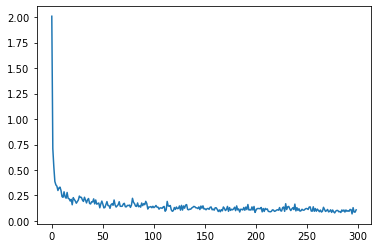

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)